# Introduction to SSM Analysis

Reproduced from the introductory vignette for [R Circumplex](https://circumplex.jmgirard.com/articles/introduction-to-ssm-analysis.html), by Girard J, Zimmermann J, Wright A (2023). circumplex: Analysis and Visualization of Circular Data. https://github.com/jmgirard/circumplex, http://circumplex.jmgirard.com/.


In [31]:
import circumplex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
degree_sign = u'\N{DEGREE SIGN}'

## 1. Background and Motivation

### Circumplex models, scales, and data

Circumplex models are popular within many areas of psychology because they offer a parsimonious account of complex psychological domains, such as emotion and interpersonal functioning. [...]



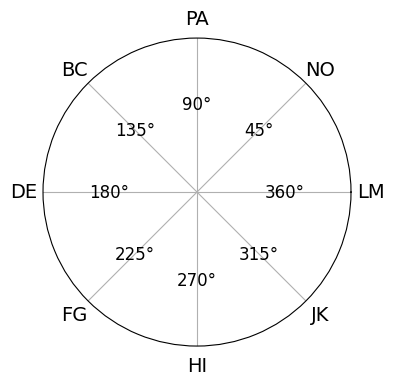

In [32]:
angles = (90, 135, 180, 225, 270, 315, 360, 45)
alabel = ("PA", "BC", "DE", "FG", "HI", "JK", "LM", "NO")

# Create plot ---------------------------------------------------------------

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

ax.plot()
ax.set_xticks(np.radians(angles), labels=alabel, fontsize=14)
ax.set_yticks([])
ax.grid(True)
for i, angle in enumerate(angles):
    ax.text(
        np.radians(angle),
        0.6,
        f"{angle}{degree_sign}",
        ha="center",
        va="center",
        fontsize=12,
)
plt.show()

### The Structural Summary Method

The Structural Summary Method (SSM) is a technique for analyzing circumplex data that offers practical and interpretive benefits over alternative techniques. [...]

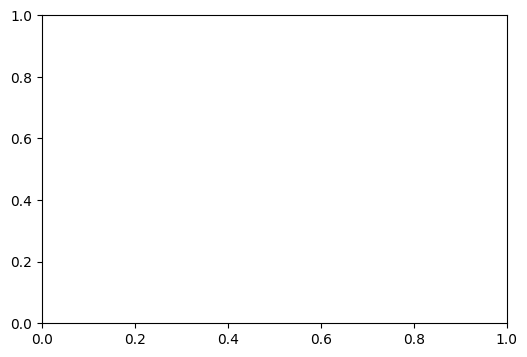

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
